<a href="https://colab.research.google.com/github/Gagandeep999/AI_Climate_Crisis_2020/blob/main/combined_emission_data_5_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Total Emissions 2016-2020", header=0, skipfooter=7)
df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)
df_2019 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2019", header=0, skipfooter=7)
df_2018 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2018", header=0, skipfooter=7)
df_2017 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2017", header=0, skipfooter=7)
df_2016 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2016", header=0, skipfooter=7)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# world.head()
# world.plot();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to b

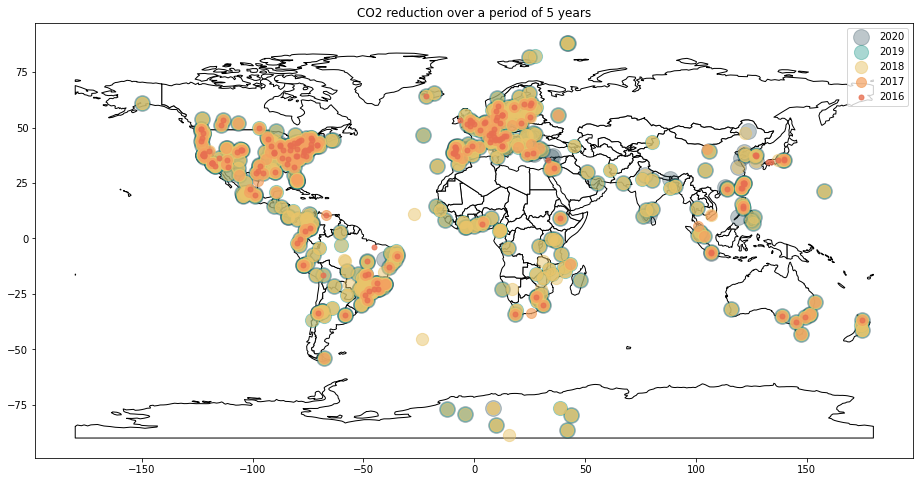

In [ ]:
# Process 2020 data
cl_2020 = df_2020[['City', 'City Location']]
cl_2020 = cl_2020.dropna()
cl_2020['City Location'] = cl_2020['City Location'].apply(wkt.loads)
cl_2020_gdf = gpd.GeoDataFrame(cl_2020, geometry='City Location')

# Process 2019 data
cl_2019 = df_2019[['City', 'City Location']]
cl_2019 = cl_2019.dropna()
cl_2019['City Location'] = cl_2019['City Location'].apply(wkt.loads)
cl_2019_gdf = gpd.GeoDataFrame(cl_2019, geometry='City Location')

# Process 2018 data
cl_2018 = df_2018[['City', 'City Location']]
cl_2018 = cl_2018.dropna()
cl_2018['City Location'] = cl_2018['City Location'].apply(wkt.loads)
cl_2018_gdf = gpd.GeoDataFrame(cl_2018, geometry='City Location')

# Process 2017 data
cl_2017 = df_2017[['City', 'City Location']]
cl_2017 = cl_2017.dropna()
cl_2017['Longitude'] = 0.0
cl_2017['Latitude'] = 0.0
for index,row in cl_2017.iterrows():
  start = row['City Location'].find('(')
  end = row['City Location'].find(')')
  loc = row['City Location'][start+1:end]
  lng, lat = loc.split()
  cl_2017['Latitude'][index] = lng[:-1]
  cl_2017['Longitude'][index] = lat
cl_2017

cl_2017_gdf = gpd.GeoDataFrame(
    cl_2017, geometry=gpd.points_from_xy(cl_2017['Longitude'], cl_2017['Latitude']))

# Process 2016 data
cl_2016 = df_2016[['City Name ', 'City Location']]
cl_2016 = cl_2016.dropna()
cl_2016['Longitude'] = 0.0
cl_2016['Latitude'] = 0.0
for index,row in cl_2016.iterrows():
  start = row['City Location'].find('(')
  end = row['City Location'].find(')')
  loc = row['City Location'][start+1:end]
  lng, lat = loc.split()
  cl_2016['Latitude'][index] = lng[:-2]
  cl_2016['Longitude'][index] = lat[:-1]
cl_2016

cl_2016_gdf = gpd.GeoDataFrame(
    cl_2016, geometry=gpd.points_from_xy(cl_2016['Longitude'], cl_2016['Latitude']))

# Plot all together
ax = world.plot(color='white', edgecolor='black', figsize=(16,8))
cl_2020_gdf.plot(ax=ax, color='#264653', markersize=250, marker='o', alpha=0.3, label='2020')
cl_2019_gdf.plot(ax=ax, color='#2A9D8F', markersize=200, marker='o', alpha=0.4, label='2019')
cl_2018_gdf.plot(ax=ax, color='#E9C46A', markersize=150, marker='o', alpha=0.5, label='2018')
cl_2017_gdf.plot(ax=ax, color='#F4A261', markersize=100, marker='o', alpha=0.7, label='2017')
cl_2016_gdf.plot(ax=ax, color='#E76F51', markersize=25, marker='o', alpha=0.8, label='2016')
plt.title('CO2 reduction over a period of 5 years')
plt.legend()
plt.show()